In [14]:
import tensorflow as tf


In [15]:
print(tf.__version__)

2.8.0


In [16]:
import numpy as np
import pandas as pd


In [17]:
from sklearn.datasets import make_circles
n_samples = 1000
X,y = make_circles(n_samples = n_samples , noise = 0.03 , random_state=42)

In [18]:
X[:10]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343],
       [-0.47964637,  0.67643477],
       [-0.01364836,  0.80334872],
       [ 0.77151327,  0.14775959],
       [-0.16932234, -0.79345575],
       [-0.1214858 ,  1.02150905]])

In [19]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [20]:
circle = pd.DataFrame({"X0" : X[:,0] , "X1" : X[:,1] , "label" : y[:]})

In [21]:
circle 

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


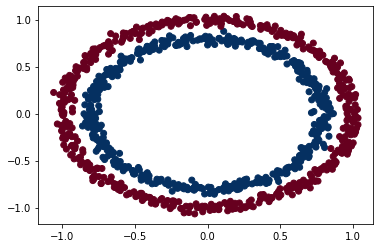

In [22]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0] , X[:,1] , c = y ,cmap="RdBu" )

In [23]:
type(X)

numpy.ndarray

In [30]:
model_1 = tf.keras.Sequential([
      tf.keras.layers.Dense(1)
])
model_1.compile(
    loss = tf.keras.losses.BinaryFocalCrossentropy(),
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ["accuracy"]
)
model_1.fit(X,y,epochs = 100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 1.8143 - accuracy: 0.4990
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.2001 - accuracy: 0.4950
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.1785 - accuracy: 0.4970
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.1746 - accuracy: 0.4960
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.1737 - accuracy: 0.4890
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.1737 - accuracy: 0.4870
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.1737 - accuracy: 0.4660
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.1737 - accuracy: 0.4800
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.1736 - accuracy: 0.4920
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.1736 - accuracy: 0.4880
Epoch 11/

In [34]:
def Model_build():
  model = tf.keras.Sequential([
      tf.keras.layers.Dense(1)
])
  model.compile(
    loss = tf.keras.losses.BinaryFocalCrossentropy(),
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ["accuracy"]
)
  model.fit(X,y,epochs = 100,verbose = 0)
  return model


32/32 [==============================] - 0s 2ms/step - loss: 0.1733 - accuracy: 0.5000


[0.17332975566387177, 0.5]

In [36]:
model_1 = Model_build()


32/32 [==============================] - 0s 2ms/step - loss: 0.1733 - accuracy: 0.5180


[0.1732991337776184, 0.5180000066757202]

In [ ]:
model_1.evaluate(X,y)

In [39]:
def Model_build():
  model = tf.keras.Sequential([
      tf.keras.layers.Dense(10, activation="relu") ,     
      tf.keras.layers.Dense(1 )
])
  model.compile(
    loss = tf.keras.losses.BinaryFocalCrossentropy(),
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ["accuracy"]
)
  model.fit(X,y,epochs = 100,verbose = 0)
  return model

model_2 = Model_build()
model_2.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.0824 - accuracy: 0.9870


[0.08244150876998901, 0.9869999885559082]

In [40]:
best_model = model_2

In [43]:
best_model.save("./")

INFO:tensorflow:Assets written to: ./assets
